In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, roc_auc_score


In [9]:
# Loading the dataset.. I have putted it into a folder called "datasets"
dataset = pd.read_csv('Social_Networks_Ads.csv')


# Describing and Exploring the dataset
print(dataset.describe())# to show the structure of the dataset. 
print(dataset.info()) # will show some statistics of every column. 


            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64

<AxesSubplot:title={'center':'Age'}, xlabel='Purchased'>

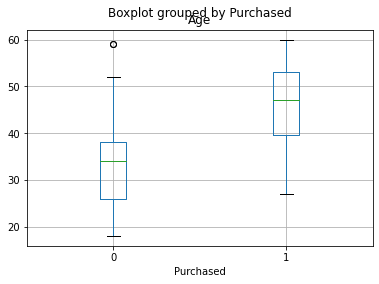

In [16]:
dataset.boxplot('Age', by='Purchased') 
# You know what is a boxplot right? I will let you interpret it.

<AxesSubplot:title={'center':'EstimatedSalary'}, xlabel='Purchased'>

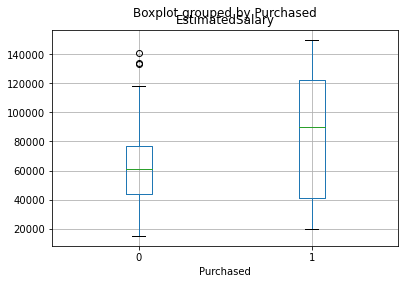

In [17]:
dataset.boxplot('EstimatedSalary', by='Purchased') # Another boxplot

In [22]:
my_model_E_Sal = smf.ols(formula='EstimatedSalary ~Purchased', data=dataset) #regression model
my_model_fit = my_model_E_Sal.fit()
#print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)
# Anova test, but we need to show the summary of 
# it in order to see the p-value and to interpret.
# What do you conclude ? -> The mean value are different because the Pi value is lower than 5%

                 sum_sq     df          F        PR(>F)
Purchased  6.081638e+10    1.0  60.052579  7.772785e-14
Residual   4.030621e+11  398.0        NaN           NaN


In [23]:
my_model_A_Sal = smf.ols(formula='Age ~Purchased', data=dataset) #regression model
my_model_fit = my_model_A_Sal.fit()
#print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)
# What do you conclude ? -> The mean value are different because the Pi value is lower than 5%

                 sum_sq     df           F        PR(>F)
Purchased  16988.250031    1.0  251.742061  2.800234e-44
Residual   26858.139969  398.0         NaN           NaN


(<Figure size 432x288 with 3 Axes>,
 {('Male', '0'): (0.0, 0.0, 0.4875621890547264, 0.6610617668994507),
  ('Male', '1'): (0.0,
   0.6643840260356633,
   0.4875621890547264,
   0.33561597396433657),
  ('Female', '0'): (0.49253731343283585,
   0.0,
   0.5074626865671642,
   0.6204807504397107),
  ('Female', '1'): (0.49253731343283585,
   0.6238030095759233,
   0.5074626865671642,
   0.37619699042407656)})

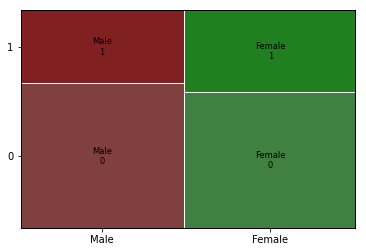

In [25]:
# There is a categorical variable in the dataset, which is Gender.
# Of course we cannot show a boxplot of Gender and Purchased.
# But we can show a table, or a mosaic plot, both tell the same thing.
mosaic(dataset,['Gender','Purchased'])

In [45]:

y = dataset['Purchased']
X = dataset[['Age','EstimatedSalary']]

X.head()

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0


In [48]:
scale = StandardScaler()
X = scale.fit_transform(X)
print(X)

[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]
 [-1.01769239 -0.34481683]
 [-1.01769239  0.41866944]
 [-0.54012675  2.35674998]
 [-1.20871865 -1.07893824]
 [-0.25358736 -0.13926283]
 [-1.11320552  0.30121002]
 [-1.11320552 -0.52100597]
 [-1.6862843   0.47739916]
 [-0.54012675 -1.51941109]
 [-1.87731056  0.35993973]
 [-0.82666613  0.30121002]
 [ 0.89257019 -1.3138571 ]
 [ 0.70154394 -1.28449224]
 [ 0.79705706 -1.22576253]
 [ 0.98808332 -1.19639767]
 [ 0.70154394 -1.40195167]
 [ 0.89257019 -0.60910054]
 [ 0.98808332 -0.84401939]
 [ 0.70154394 -1.40195167]
 [ 0.79705706 -1.37258681]
 [ 0.89257019 -1.46068138]
 [ 1.08359645 -1.22576253]
 [ 0.89257019 -1.16703281]
 [-0.82666613 -0.78528968]
 [-0.63563988 -1.51941109]
 [-0.63563988  0.12502088]
 [-1.01769239  1.97500684]
 [-1.59077117 -1.5781408 ]
 [-0.92217926 -0.75592482]
 [-1.01769239  0.59485858]
 [-0.25358736 -1.25512738]
 [-0.44461362 -1.22576253]
 

In [50]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [54]:
clf = LogisticRegression(random_state=0)
model = clf.fit(X_train,y_train)
y_pred = model.predict(X_test)

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


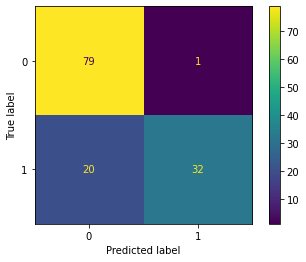

In [61]:
plot_confusion_matrix(model,X_test,y_test)

In [63]:
roc_auc_score(y_test, model.decision_function(X_test))

0.948076923076923

### LDA

In [64]:
y = dataset['Purchased']
X = dataset[['Age','EstimatedSalary']]

classified_lda = LinearDiscriminantAnalysis()
classified_lda_fit = classified_lda.fit(X_train,y_train)
y_pred2 = classified_lda_fit.predict(X_test)

In [65]:
str(y_pred2)

'[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0\n 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0\n 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0\n 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]'

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


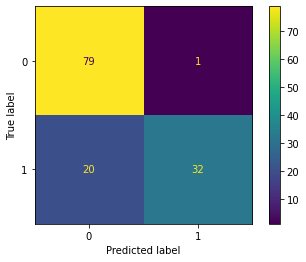

In [66]:
plot_confusion_matrix(classified_lda_fit,X_test,y_test)